In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def prep(data_folder_path):
    dirs = os.listdir(data_folder_path)
    
    images = []
    labels = []
  
    for dir_name in dirs:
        print(dir_name)
  
            
        if dir_name=='CROW':
 
          label = 0
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
          
        elif dir_name=='EMU':
          label= 1
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
 
        elif dir_name=='COCKATOO':
          label= 2
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
        
        elif dir_name=='GOLDEN EAGLE':
          label= 3
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
        
        elif dir_name=='FLAMINGO':
          label= 4
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
        
        elif dir_name=='MALABAR HORNBILL':
          label= 5
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
        
        elif dir_name=='OTHER':
          label= 6
          subject_dir_path = data_folder_path + "/" + dir_name
          subject_images_names = os.listdir(subject_dir_path)
        
          for image_name in subject_images_names:
            
              if image_name.startswith("."):
                  continue;
              
              image_path = subject_dir_path + "/" + image_name
              images.append( image_path)            
              labels.append(label)
        
            
    return images,labels

In [ ]:
path = "/content/drive/My Drive/DATASETS/train"
train_img , train_lab = prep(path)

CROW
OTHER
EMU
FLAMINGO
COCKATOO
GOLDEN EAGLE
MALABAR HORNBILL


In [ ]:
path = "/content/drive/My Drive/DATASETS/test"
test_img , test_lab = prep(path)

CROW
OTHER
EMU
FLAMINGO
COCKATOO
GOLDEN EAGLE
MALABAR HORNBILL


In [ ]:
import pickle

with open("/content/drive/My Drive/DATASETS/bird_nonorm.pickle","rb") as f:
    trainY,trainX,testY,testX = pickle.load(f)

# LOADING TRAINING AND TESTING IMAGES AND PREPROCESSING FOR INPUT 

In [ ]:
tl = len(train_img)
train_data = []
c=0
for path in train_img:
  img = load_img(path,target_size=(224,224))
  img = np.array(img)
  img = img_to_array(img)
  img = preprocess_input(img)
  train_data.append(img)
  c+=1
  # print(c)
print(c)

825


In [ ]:
tl = len(test_img)
test_data = []
c=0
for path in test_img:
  img = load_img(path,target_size=(224,224))
  img = np.array(img)
  img = img_to_array(img)
  img = preprocess_input(img)
  test_data.append(img)
  c+=1
  # print(c)
print(c)

142


In [ ]:
trainY ,testY = np.array(train_data) , np.array(test_data)
trainX , testX = np.array(train_lab) , np.array(test_lab)

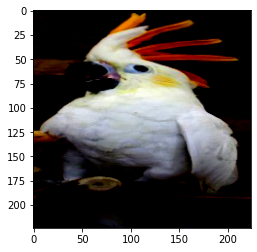

In [ ]:
plt.imshow(trainY[551])

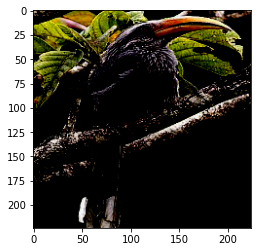

In [ ]:
plt.imshow(testY[125])

In [ ]:
import pickle
with open("/content/drive/My Drive/DATASETS/bird_nonorm.pickle","wb") as f:
  pickle.dump([trainY,trainX,testY,testX],f)

In [ ]:
## DO NOT RUN ##
trainY = trainY/255.0
testY = testY/255.0

In [ ]:
import pickle
with open("/content/drive/My Drive/DATASETS/bird_norm.pickle","wb") as f:
  pickle.dump([trainY,trainX,testY,testX],f)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

# BUILDING THE MODEL

In [ ]:
########## vgg19
baseModel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
for layer in baseModel.layers:
    layer.trainable = False
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(7, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

# COMPILING MODEL AND DEFINING PARAMETERS

In [ ]:
INIT_LR = 1e-4
EPOCHS = 100
BS = 64
 
opt = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
print(trainY.shape)

(816, 224, 224, 3)


In [ ]:
from tensorflow import keras
class callbacks(keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.95:
      print("\n Accuracy reached \n")
      self.model.stop_training = True
callbacks = callbacks()

# FITTING THE MODEL

In [ ]:
H = model.fit(
    aug.flow(trainY,trainX),
    steps_per_epoch=len(trainX)//BS,
    validation_data=aug.flow(testY,testX),
    epochs=100,shuffle=True,callbacks = [callbacks],verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 630ms/step - loss: 1.9540 - accuracy: 0.1538 - val_loss: 1.8744 - val_accuracy: 0.1690
Epoch 2/100
12/12 [==============================] - 6s 522ms/step - loss: 1.8232 - accuracy: 0.2474 - val_loss: 1.7590 - val_accuracy: 0.4014
Epoch 3/100
12/12 [==============================] - 6s 520ms/step - loss: 1.7354 - accuracy: 0.4557 - val_loss: 1.6331 - val_accuracy: 0.6690
Epoch 4/100
12/12 [==============================] - 6s 522ms/step - loss: 1.6403 - accuracy: 0.5078 - val_loss: 1.5367 - val_accuracy: 0.6620
Epoch 5/100
12/12 [==============================] - 6s 520ms/step - loss: 1.4821 - accuracy: 0.6525 - val_loss: 1.4262 - val_accuracy: 0.7183
Epoch 6/100
12/12 [==============================] - 6s 518ms/step - loss: 1.4262 - accuracy: 0.6823 - val_loss: 1.3014 - val_accuracy: 0.8310
Epoch 7/100
12/12 [==============================] - 6s 517ms/step - loss: 1.3343 - accuracy: 0.6901 - val_loss: 1.1931 - val_accuracy: 0.8732

# PLOTTING ACCURACY AND LOSS FOR TRAINING AND TESTING

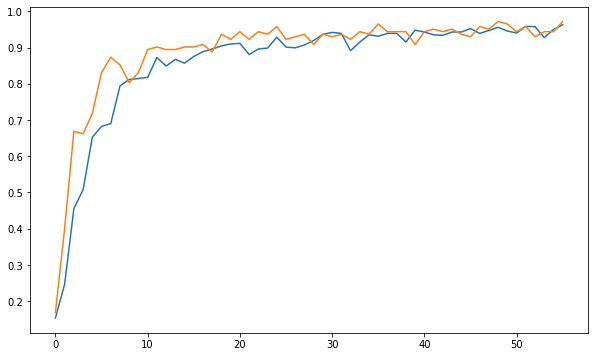

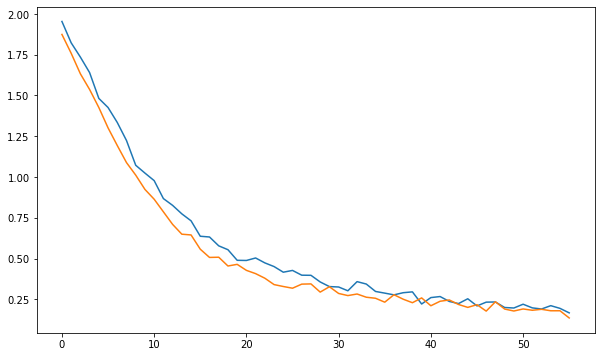

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(10,6))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.figure(figsize=(10,6))
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)

Confusion matrix

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Crow
64.06156420707703


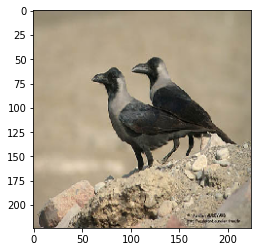

In [ ]:
clas = ['Crow','Emu','Cockatoo','Golden Eagle','Flamingo','Malabar Hornbill','Unknown']
img = load_img('/content/drive/My Drive/DATASETS/val/CROW/03.jpg',target_size=(224,224))
#img = load_img('eagle-1.jpg',target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)
images = np.vstack([img])
#img = preprocess_input(img)
y = model.predict(images)
print(clas[np.argmax(y)])
print(y[0][np.argmax(y)]*100)

<IPython.core.display.Javascript object>

Malabar Hornbill
100.0


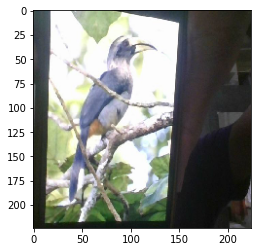

In [ ]:
filename  = take_photo()
img = load_img('/content/photo.jpg',target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)
images = np.vstack([img])
#img = preprocess_input(img)
y = model.predict(images)
print(clas[np.argmax(y)])
print(y[0][np.argmax(y)]*100)

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("/content/drive/My Drive/DATASETS/VGG19_model_birds.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/My Drive/DATASETS/VGG19_model_birds_weights.h5")

# CONVERTING TO TFLITE MODEL

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# img = tf.data.Dataset.from_tensor_slices(testX).batch(1)

# def rep_data_gen():
#     for i in img.take(100):
#             yield [i]

# def representative_data_gen():
#     for input_value, _ in test_batch.take(100):
#         yield [input_value]

# converter.representative_dataset = rep_data_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('/content/drive/My Drive/DATASETS/VGG19_birds_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpj_m7uz2n/assets


INFO:tensorflow:Assets written to: /tmp/tmpj_m7uz2n/assets


In [ ]:
with open('/content/drive/My Drive/DATASETS/bird_labels.txt', 'w') as f:
    f.write('\n'.join(clas))

## PREDICTING ON THE TEST DATASET

In [ ]:
path = "/content/drive/My Drive/DATASETS/val"
val_img , val_lab = prep(path)

EMU
CROW
MALABAR HORNBILL
GOLDEN EAGLE
FLAMINGO
COCKATOO
OTHER


In [ ]:
tl = len(val_img)
val_data = []
c=0
for path in val_img:
  img = load_img(path,target_size=(224,224))
  img = np.array(img)
  img = img_to_array(img)
  img = preprocess_input(img)
  val_data.append(img)
  #c+=1
  # print(c)
print(tl)

34


In [ ]:
valY ,valX = np.array(val_data) , np.array(val_lab)

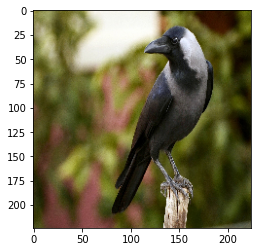

In [ ]:
plt.imshow(valY[5])

In [ ]:
pred=model.predict(valY)
y_pred=[]
for i in range (0,len(pred)):
  y_pred.append(np.argmax(pred[i]))

print(y_pred)
print(pred.shape)

[1, 1, 6, 6, 0, 0, 2, 0, 0, 6, 4, 4, 6, 0, 2, 3, 3, 3, 3, 2, 4, 4, 4, 4, 2, 6, 2, 2, 2, 6, 6, 6, 6, 6]
(34, 7)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

print('\nClassification Report\n')
print(classification_report(valX, y_pred,target_names=['Crow','Emu','Cockatoo','Golden Eagle','Flamingo','Malabar Hornbill','Other']))


print('\nConfusion Matrix\n')
print(pd.DataFrame(confusion_matrix(valX,y_pred),index=['Crow','Emu','Cockatoo','Golden Eagle','Flamingo','Malabar Hornbill','Other']))


Classification Report

                  precision    recall  f1-score   support

            Crow       0.80      0.80      0.80         5
             Emu       1.00      0.50      0.67         4
        Cockatoo       0.57      0.80      0.67         5
    Golden Eagle       1.00      0.80      0.89         5
        Flamingo       0.67      0.80      0.73         5
Malabar Hornbill       0.00      0.00      0.00         5
           Other       0.50      1.00      0.67         5

        accuracy                           0.68        34
       macro avg       0.65      0.67      0.63        34
    weighted avg       0.64      0.68      0.63        34


Confusion Matrix

                  0  1  2  3  4  5  6
Crow              4  0  1  0  0  0  0
Emu               0  2  0  0  0  0  2
Cockatoo          0  0  4  0  0  0  1
Golden Eagle      0  0  1  4  0  0  0
Flamingo          0  0  1  0  4  0  0
Malabar Hornbill  1  0  0  0  2  0  2
Other             0  0  0  0  0  0  5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
